# Importar modulos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
plt.rcParams["figure.figsize"] = (20,10)

# Funciones de utileria

In [6]:
def getTasa(time,corpus_size):
    corpus_size_bits = corpus_size*8
    corpus_size_mb   = corpus_size/125000
    tasa_bits_secs   = corpus_size_bits/time
    tasa_bytes_secs  = corpus_size/time
    tasa_mb_secs     = corpus_size_mb/time
    return {'BITS/SEC':(corpus_size_bits,tasa_bits_secs),'BYTES/SEC':(corpus_size,tasa_bytes_secs),'MB/SEC':(corpus_size_mb,tasa_mb_secs)}

def getInfo(**kwargs):
    dfa              = kwargs.get('df') 
    time             = dfa.TIME.sum()/1000
    time_min         = time/60
    corpus_size      = dfa.FILE_SIZE.sum()
    tasas            = getTasa(time,corpus_size)
    tasa_bits_secs   = tasas['BITS/SEC']
    tasa_bytes_secs  = tasas['BYTES/SEC']
    tasa_mb_secs     = tasas['MB/SEC']
    keyLen           = dfa.KEY_LENGTH.unique()[0]
    cipher           = dfa.CIPHER.unique()[0]+"[{}]".format(keyLen)
    
    return (cipher,time,time_min,*tasa_bits_secs,*tasa_bytes_secs,*tasa_mb_secs)
    

# Cipher(Encrypt mode)

In [7]:
df      = pd.read_csv('data.csv')
des     = df.loc[df.CIPHER=='DES']
desede  = df.loc[df.CIPHER=='DESede']
aes_128 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==128]
aes_192 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==192]
aes_256 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF!='PBKDF2WithHmacSHA384'].loc[df.KDF!='PBKDF2WithHmacSHA512']
# 
aes_256_sha384 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA384']
df.loc[aes_256_sha384.index,'CIPHER']="AES_SHA384"
aes_256_sha384 = df.loc[df.CIPHER=='AES_SHA384'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA384']
# 
aes_256_sha512 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA512']
df.loc[aes_256_sha512.index,'CIPHER']="AES_SHA512"
aes_256_sha512 = df.loc[df.CIPHER=='AES_SHA512'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA512']
infos = list(map(lambda x:getInfo(df=x),(des,desede,aes_128,aes_192,aes_256,aes_256_sha384,aes_256_sha512)))

# Cipher(Decrypt mode)

In [8]:
dff  = pd.read_csv('data_decrypted.csv')
dff.head(5)
_des     = dff.loc[dff.CIPHER=='DES']
_desede  = dff.loc[dff.CIPHER=='DESede']
_aes_128 = dff.loc[dff.CIPHER=='AES'].loc[dff.KEY_LENGTH==128]
_aes_192 = dff.loc[dff.CIPHER=='AES'].loc[dff.KEY_LENGTH==192]
_aes_256 = dff.loc[dff.CIPHER=='AES'].loc[dff.KEY_LENGTH==256].loc[dff.KDF!='PBKDF2WithHmacSHA384'].loc[df.KDF!='PBKDF2WithHmacSHA512']

# 
_aes_256_sha384 = dff.loc[df.CIPHER=='AES'].loc[dff.KEY_LENGTH==256].loc[dff.KDF=='PBKDF2WithHmacSHA384']
dff.loc[aes_256_sha384.index,'CIPHER']="AES_SHA384"
_aes_256_sha384 = dff.loc[dff.CIPHER=='AES_SHA384'].loc[dff.KEY_LENGTH==256].loc[dff.KDF=='PBKDF2WithHmacSHA384']
# 
_aes_256_sha512 = dff.loc[df.CIPHER=='AES'].loc[dff.KEY_LENGTH==256].loc[dff.KDF=='PBKDF2WithHmacSHA512']
dff.loc[aes_256_sha512.index,'CIPHER']="AES_SHA512"
_aes_256_sha512 = dff.loc[df.CIPHER=='AES_SHA512'].loc[dff.KEY_LENGTH==256].loc[dff.KDF=='PBKDF2WithHmacSHA512']
_infos = list(map(lambda x:getInfo(df=x),(_des,_desede,_aes_128,_aes_192,_aes_256,_aes_256_sha384,_aes_256_sha512)))

# RESULTADOS

In [9]:
info_df = pd.DataFrame(infos,columns=["CIPHER","TIME(SEC)","TIME(MIN)","SIZE(BITS)","TASA(BITS/SEC)","SIZE(BYTES)","TASA(BYTES/SEC)","SIZE(MB)","TASA(MB/SEC)"])
info_df = info_df.sort_values("TIME(SEC)",ascending=True)

# Grafica 00


Muestra la cantidad de tiempo en segundos que tomo cada uno de los cifrados

<AxesSubplot:xlabel='CIPHER', ylabel='TIME(SEC)'>

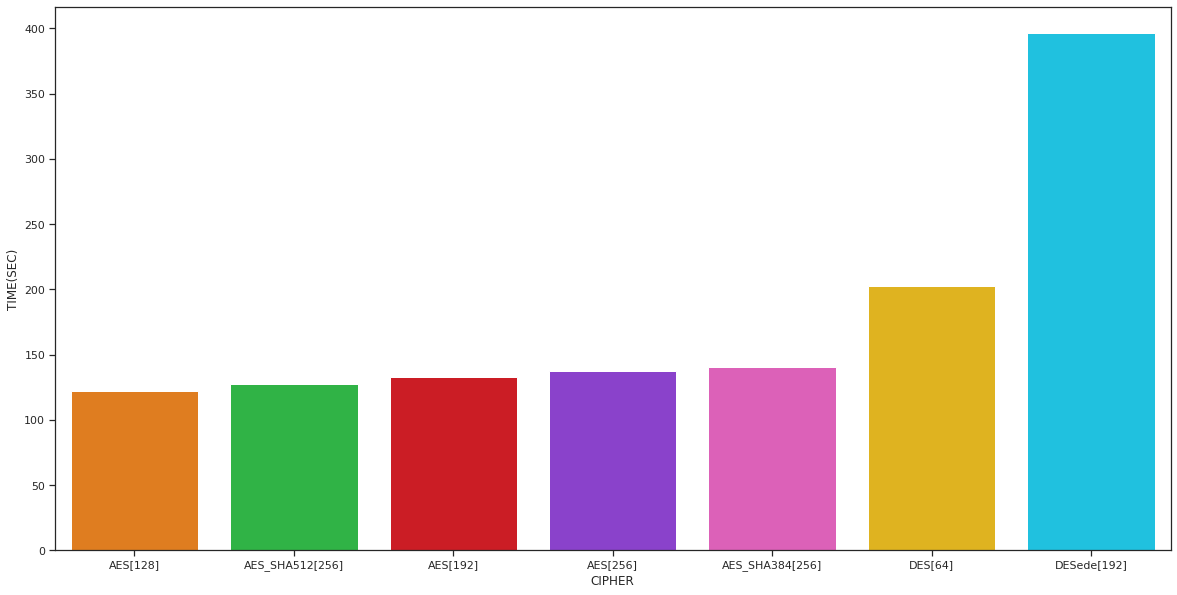

In [24]:
colors = ['#FF7C00','#1AC938','#E8000B','#8B2BE2','#F14CC1','#FFC400','#00D7FF']
sns.barplot(x="CIPHER",y="TIME(SEC)",data=info_df,palette=colors)

# Grafica 01

Muestra la tasa en bits sobre segundo de cada uno de los cifrados en cifrar el corpus $\mathbb D$

<AxesSubplot:xlabel='CIPHER', ylabel='TASA(BITS/SEC)'>

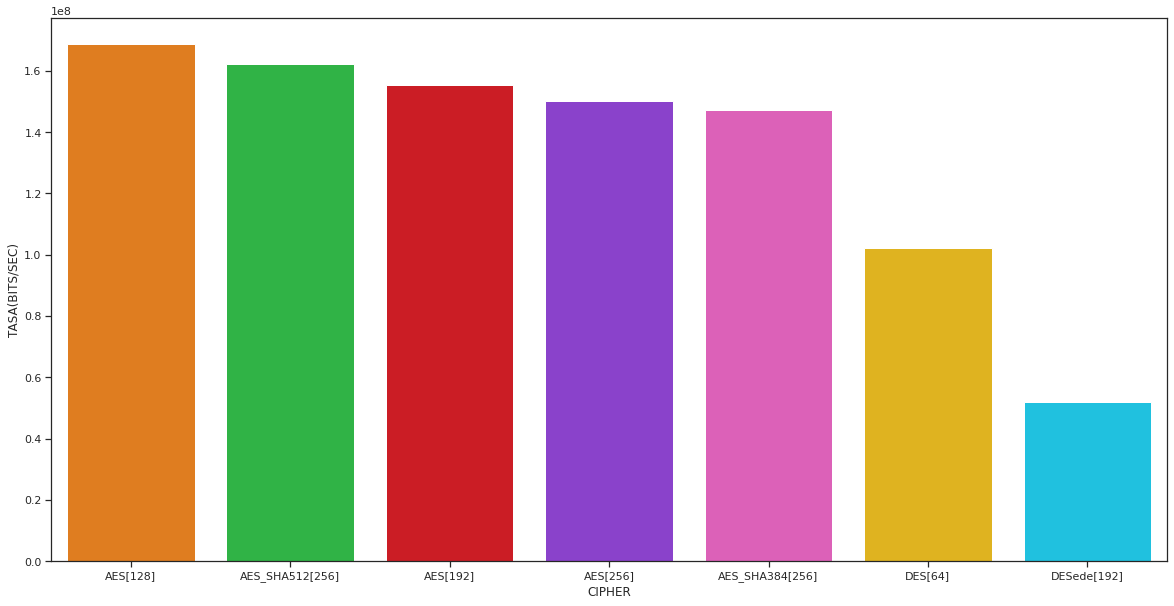

In [27]:
sns.barplot(x="CIPHER",y="TASA(BITS/SEC)",data=info_df,palette=colors)

# Grafica 02

Muestra la tasa en Megabytes sobre segundo de cada uno de los cifrados

<AxesSubplot:xlabel='CIPHER', ylabel='TASA(MB/SEC)'>

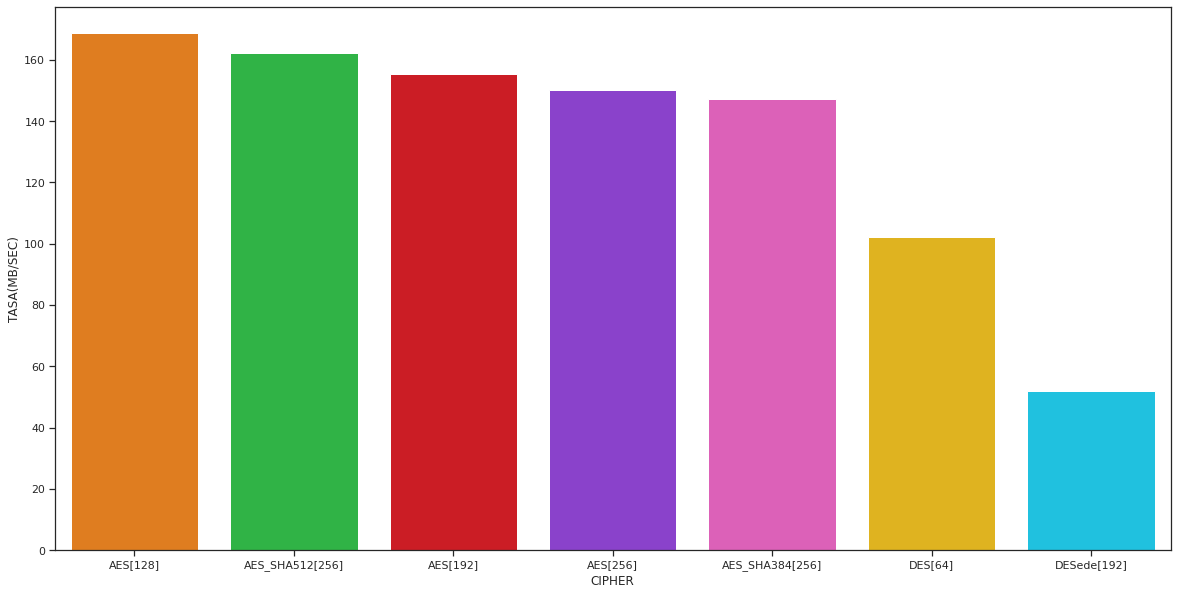

In [28]:
sns.barplot(x="CIPHER",y="TASA(MB/SEC)",data=info_df,palette=colors)

# Decrypt Mode

In [30]:
_info_df = pd.DataFrame(_infos,columns=["CIPHER","TIME(SEC)","TIME(MIN)","SIZE(BITS)","TASA(BITS/SEC)","SIZE(BYTES)","TASA(BYTES/SEC)","SIZE(MB)","TASA(MB/SEC)"])
_info_df = _info_df.sort_values("TIME(SEC)",ascending=True)

# Grafica 03

Muestra el tiempo en segundos que le toma decifrar el corpus $\mathbb D$

<AxesSubplot:xlabel='CIPHER', ylabel='TIME(SEC)'>

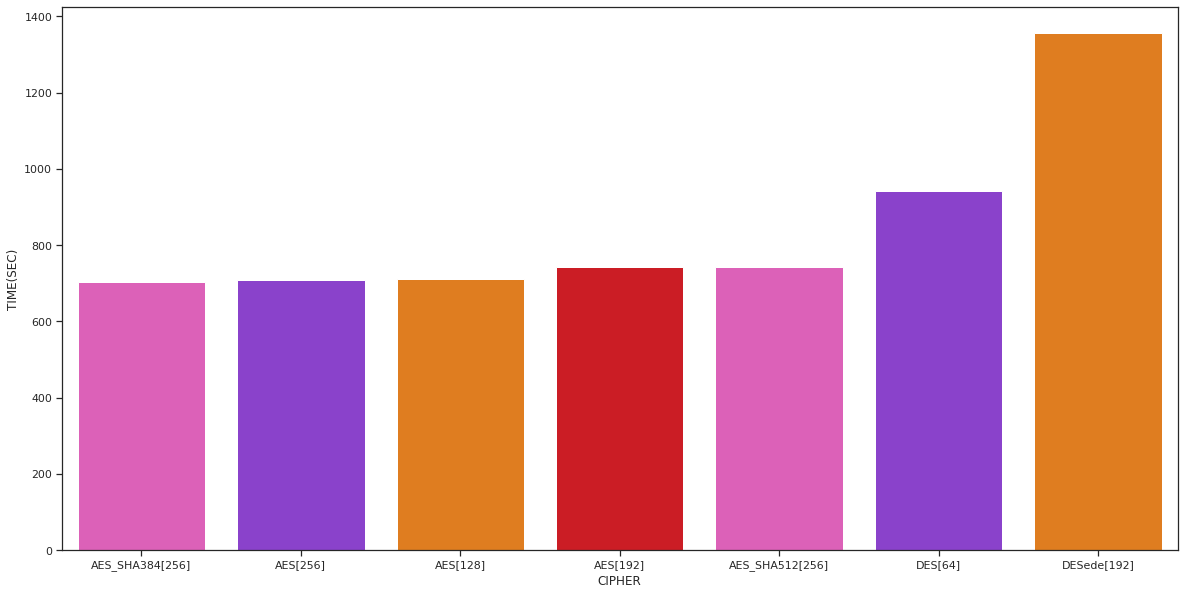

In [34]:
colors2 =[colors[4],colors[3],colors[0],colors[2],colors[]]
sns.barplot(x="CIPHER",y="TIME(SEC)",data=_info_df,palette=colors2)

# Grafica 04

Muestra la tasa en megabytes por segundo que le toma a cada cifrador, decifrar el corpus $\mathbb D$

<AxesSubplot:xlabel='CIPHER', ylabel='TASA(MB/SEC)'>

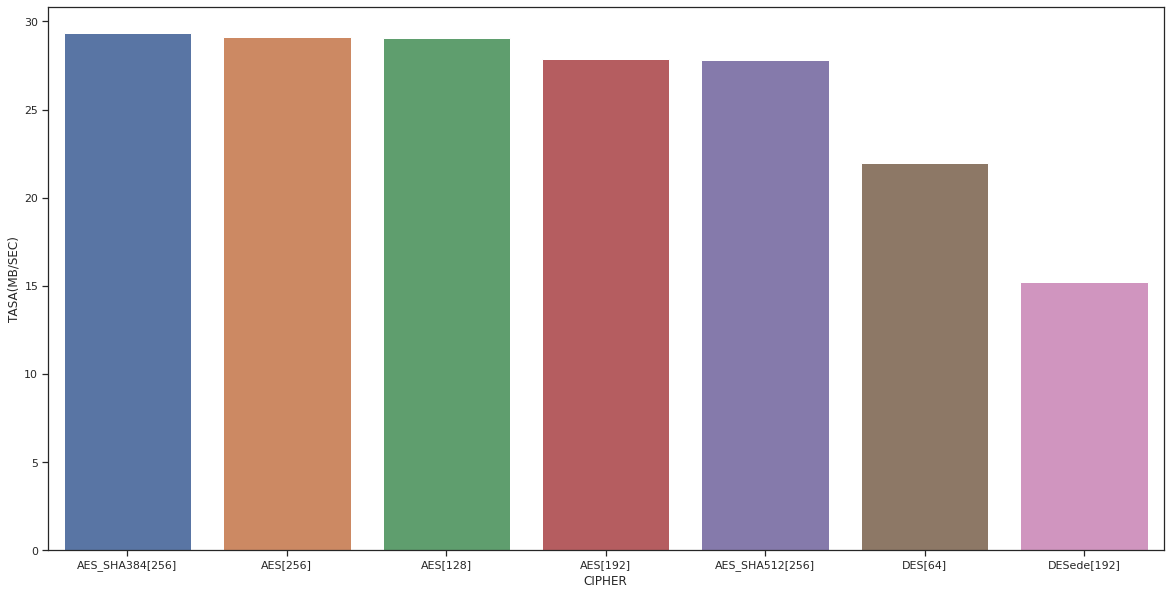

In [489]:
sns.barplot(x="CIPHER",y="TASA(MB/SEC)",data=_info_df)

In [4]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]